## Import Tubs

Create X and Y training sets.  X is the images, y is the angles (labels)




In [1]:
import keras
import json
from PIL import Image
import pprint
import glob
import os
import numpy as np
import pandas as pd
print('done')

Using TensorFlow backend.


In [14]:
path = '/Users/adam/d2/data/tub_4_17-09-16/'

#define images and angles arrays.
images = []
angles = []

for filename in glob.glob(os.path.join(path, 'record*.json')):    
    with open(filename, encoding='utf-8') as data_file:
        data = json.loads(data_file.read())
        angles.append(data['user/angle'])
    img = Image.open(os.path.join(path, data['cam/image_array']))
    img = np.array(img)
    images.append(img)

X_train = np.array(images)
y_train = np.array(angles)
print('done')

done


## Explore the data

Number of Angles imported =  83
Number of images imported =  83
Shape of Angles numpy array =  (83,)
Shape of Images =  (120, 160, 3)


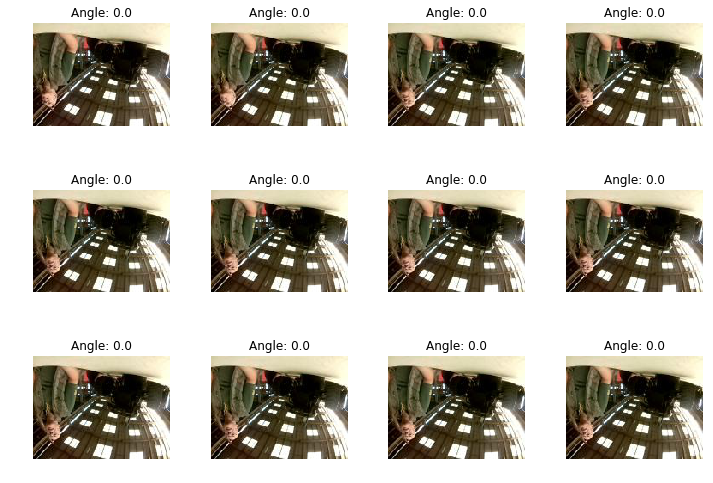

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

print('Number of Angles imported = ', len(angles))    
print('Number of images imported = ', len(X_train))
print('Shape of Angles numpy array = ', y_train.shape)
print('Shape of Images = ', X_train[1].shape)

fig = plt.figure(figsize = (12,33))
for i in range(12):
    fig.add_subplot(11,4,i+1)
    plt.title("Angle: " + str(y_train[i]))
    plt.axis('off')
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.imshow(images[i])

## Prepare the data 

In [16]:
EPOCHS  = 10

from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers.convolutional import Convolution2D, Cropping2D


model = Sequential()
# Normalize Data
model.add(Lambda(lambda x: x/255.0 - 0.5, input_shape=(120,160,3)))
# Crop image
#model.add(Cropping2D(cropping=((70,25),(0,0))))

#NVIDIA Model
model.add(Convolution2D(24,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(36,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(48,5,5, subsample=(2,2), activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Convolution2D(64,3,3, activation='relu'))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(10))
model.add(Dense(1))

#Old model
#model.add(Flatten(input_shape=(160,320,3)))
#model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
# shuffles data and makes 20% of data validation data.
model.fit(X_train, y_train, validation_split = .2,shuffle = True, nb_epoch=EPOCHS)


model.save('model.h5')
exit()

/Users/adam/miniconda3/envs/donkey/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), activation="relu", strides=(2, 2))`
  from ipykernel import kernelapp as app
/Users/adam/miniconda3/envs/donkey/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="relu", strides=(2, 2))`
  app.launch_new_instance()
/Users/adam/miniconda3/envs/donkey/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="relu", strides=(2, 2))`
/Users/adam/miniconda3/envs/donkey/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
/Users/adam/miniconda3/envs/donkey/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to 

Train on 66 samples, validate on 17 samples
Epoch 1/10
66/66 [==============================] - 1s - loss: 0.4267 - val_loss: 0.0020
Epoch 2/10
66/66 [==============================] - 0s - loss: 0.0024 - val_loss: 0.0013
Epoch 3/10
66/66 [==============================] - 0s - loss: 0.0010 - val_loss: 0.0014
Epoch 4/10
66/66 [==============================] - 0s - loss: 6.1843e-04 - val_loss: 3.9895e-04
Epoch 5/10
66/66 [==============================] - 0s - loss: 2.8335e-04 - val_loss: 4.8452e-04
Epoch 6/10
66/66 [==============================] - 0s - loss: 2.9718e-04 - val_loss: 2.5341e-05
Epoch 7/10
66/66 [==============================] - 0s - loss: 1.1898e-04 - val_loss: 1.5269e-04
Epoch 8/10
66/66 [==============================] - 0s - loss: 8.2204e-05 - val_loss: 5.6041e-06
Epoch 9/10
66/66 [==============================] - 0s - loss: 3.0124e-05 - val_loss: 3.1364e-05
Epoch 10/10
66/66 [==============================] - 0s - loss: 1.5779e-05 - val_loss: 3.9134e-05
